In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mplb
import seaborn as sns
import scypy as sp

In [39]:
df = pd.read_csv(
    filepath_or_buffer="data.csv",
    parse_dates=["Date"]
)
df.head()

,Date,Region,Product,SalesCount
0,2022-01-03,South,Product C,716
1,2022-01-04,South,Product C,1623
2,2022-01-07,South,Product A,1159
3,2022-01-12,West,Product B,501
4,2022-01-21,East,Product B,1567


<Axes: xlabel='Product'>

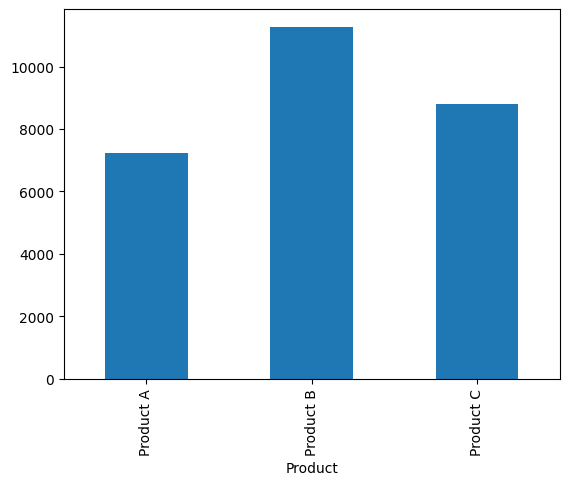

In [40]:
df[(df.Date.dt.year == 2022) & (df.Region == "South")].groupby("Product")["SalesCount"].agg("sum").plot(
    x="Product",
    y="SalesCount",
    kind="bar"
)

In [41]:
df.head()

,Date,Region,Product,SalesCount
0,2022-01-03,South,Product C,716
1,2022-01-04,South,Product C,1623
2,2022-01-07,South,Product A,1159
3,2022-01-12,West,Product B,501
4,2022-01-21,East,Product B,1567


In [42]:
df["weekday"] = df.Date.dt.day_of_week
df.head()

,Date,Region,Product,SalesCount,weekday
0,2022-01-03,South,Product C,716,0
1,2022-01-04,South,Product C,1623,1
2,2022-01-07,South,Product A,1159,4
3,2022-01-12,West,Product B,501,2
4,2022-01-21,East,Product B,1567,4


In [43]:
df.groupby("weekday")["SalesCount"].agg('median')

weekday
0    1280.5
1    1245.0
2    1100.0
3    1433.0
4    1549.0
5    1288.0
6    1296.0
Name: SalesCount, dtype: float64

In [46]:
df[df.SalesCount == df.SalesCount.min()]
df.SalesCount.min()

np.int64(501)

<Axes: xlabel='weekday', ylabel='Sales'>

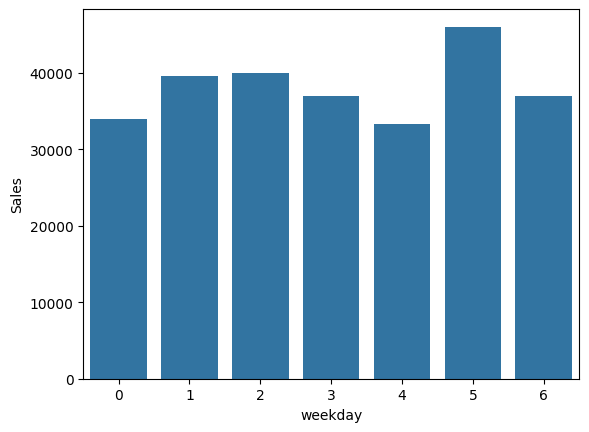

In [45]:
datum = pd.DataFrame()
datum["Sales"] = df.groupby("weekday")["SalesCount"].agg('sum')
datum.reset_index(inplace=True)
sns.barplot(
    data = datum,
    x = datum.weekday,
    y = datum.Sales,
)